In [4]:
#Import header
import pandas as pd
#file
file_path = 'C:/Users/Tobia/Desktop/DM Projekt/train.csv'
#read csv
df = pd.read_csv(file_path)

In [5]:
#first rows
print(df.head())
#datatype
print(df.dtypes)

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [53]:
# Verteilung der kategorischen Daten
print(df.select_dtypes(include=['object']).describe())
print(df.isnull().mean() * 100)


                      Dates       Category                      Descript  \
count                878049         878049                        878049   
unique               389257             39                           879   
top     2011-01-01 00:01:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
freq                    185         174900                         60022   

       DayOfWeek PdDistrict Resolution                 Address  
count     878049     878049     878049                  878049  
unique         7         10         17                   23228  
top       Friday   SOUTHERN       NONE  800 Block of BRYANT ST  
freq      133734     157182     526790                   26533  
Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
is_assault    0.0
dtype: float64


In [42]:
for column in df.columns:
    # numeric
    if df[column].dtype in ['int64', 'float64']:
        print(f'{column} (Numeric):')
        print('  Min:', df[column].min())
        print('  Max:', df[column].max())
    # object
    elif df[column].dtype == 'object':
        print(f'{column} (Categorical):')
        print('  Unique Values:', df[column].nunique())
        print('  Values:', df[column].unique())
    print()

Dates (Categorical):
  Unique Values: 389257
  Values: ['2015-05-13 23:53:00' '2015-05-13 23:33:00' '2015-05-13 23:30:00' ...
 '2003-01-06 00:20:00' '2003-01-06 00:15:00' '2003-01-06 00:01:00']

Category (Categorical):
  Unique Values: 39
  Values: ['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']

Descript (Categorical):
  Unique Values: 879
  Values: ['WARRANT ARREST' 'TRAFFIC VIOLATION ARREST'
 'GRAND THEFT FROM LOCKED AUTO' 'GRAND THEFT FR

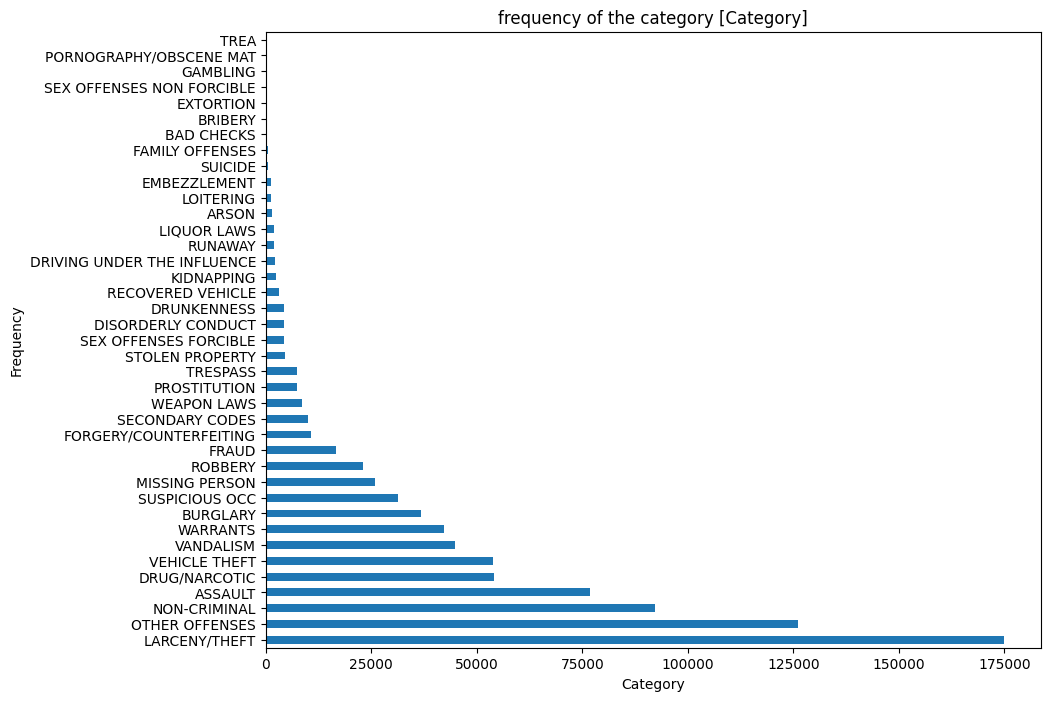

In [39]:
#show the distirbution of crimes in the original file to get an overview
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
df['Category'].value_counts().plot(kind='barh')
plt.title('frequency of the category [Category]')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [76]:
# filter for needed crimes
crimes_we_need = ["LARCENY/THEFT", "ASSAULT", "DRUG/NARCOTIC", "VEHICLE THEFT", "BURGLARY"]
filter_df = df[df['Category'].isin(crimes_we_need)]

# print new filter_df
print(filter_df.head())
print(filter_df.dtypes)

#check distribution
print(filter_df.select_dtypes(include=['object']).describe())

#check for missingno
print('Missing values:')
print(filter_df.isnull().sum())
filter_df.select_dtypes(include=['object']).describe()

                 Dates       Category                        Descript  \
3  2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00  LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   

   DayOfWeek PdDistrict Resolution                    Address           X  \
3  Wednesday   NORTHERN       NONE   1500 Block of LOMBARD ST -122.426995   
4  Wednesday       PARK       NONE  100 Block of BRODERICK ST -122.438738   
5  Wednesday  INGLESIDE       NONE        0 Block of TEDDY AV -122.403252   
6  Wednesday  INGLESIDE       NONE        AVALON AV / PERU AV -122.423327   
7  Wednesday    BAYVIEW       NONE   KIRKWOOD AV / DONAHUE ST -122.371274   

           Y  
3  37.800873  
4  37.771541  
5  37.713431  
6  37.725138  
7  37.727564  
Dates   

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,396281,396281,396281,396281,396281,396281,396281
unique,216685,5,267,7,10,17,21077
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,35,174898,60021,60624,72822,286046,9369


In [77]:
filter_df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
...,...,...,...,...,...,...,...,...,...
878036,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948


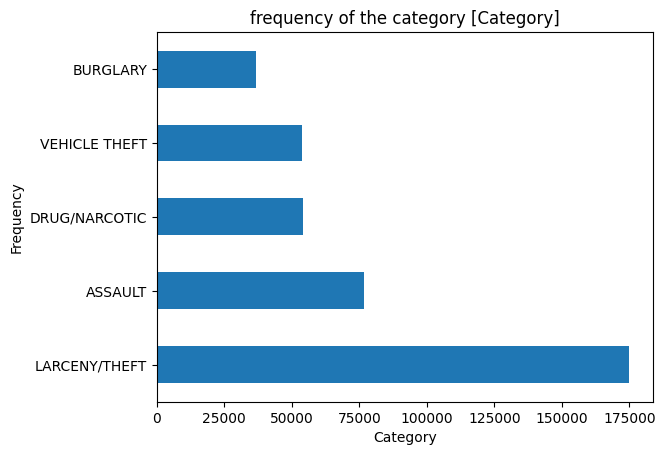

In [65]:
# plot new df
filter_df['Category'].value_counts().plot(kind='barh')
plt.title('frequency of the category [Category]')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# change 'Category' in binary(1 for 'Assault' else 0)
df['is_assault'] = df['Category'].apply(lambda x: 1 if x == 'ASSAULT' else 0)

# Selecting features und target
X = df[['X', 'Y']]
y = df['is_assault'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# generating model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict on test
y_pred = model.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    240318
           1       0.00      0.00      0.00     23097

    accuracy                           0.91    263415
   macro avg       0.46      0.50      0.48    263415
weighted avg       0.83      0.91      0.87    263415

[[240318      0]
 [ 23097      0]]


C:\Users\Tobia\PycharmProjects\SF-CrimePredict\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobia\PycharmProjects\SF-CrimePredict\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobia\PycharmProjects\SF-CrimePredict\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier